In [ ]:
# import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Data Exploration and Understanding

In [ ]:
import os
from collections import defaultdict

def count_file_types(folder):
    file_types = defaultdict(int)
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        if os.path.isfile(file_path):
            ext = os.path.splitext(file)[-1].lower().lstrip('.')
            file_types[ext] += 1
    return file_types

def list_folders(directory, indent=0):
    for item in os.listdir(directory):
        if item =='ve':
            continue
        path = os.path.join(directory, item)
        if os.path.isdir(path):
            print("  " * indent + f"📂 {item}")
            file_counts = count_file_types(path)
            if file_counts:
                file_counts_str = ", ".join(f"{count} {ext}" for ext, count in file_counts.items())
                print("  " * (indent + 1) + f"📄 {file_counts_str}")
            list_folders(path, indent + 1)

if __name__ == "__main__":
    current_directory = os.getcwd()
    print(f"Root: {current_directory}")
    list_folders(current_directory)

Root: d:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability
📂 .git
  📄 6 
  📂 hooks
    📄 14 sample
  📂 info
    📄 1 
  📂 logs
    📄 1 
    📂 refs
      📂 heads
        📄 1 
      📂 remotes
        📂 origin
          📄 1 
  📂 objects
    📂 00
      📄 512 
    📂 01
      📄 519 
    📂 02
      📄 518 
    📂 03
      📄 497 
    📂 04
      📄 547 
    📂 05
      📄 540 
    📂 06
      📄 558 
    📂 07
      📄 574 
    📂 08
      📄 557 
    📂 09
      📄 557 
    📂 0a
      📄 548 
    📂 0b
      📄 529 
    📂 0c
      📄 532 
    📂 0d
      📄 539 
    📂 0e
      📄 566 
    📂 0f
      📄 552 
    📂 10
      📄 561 
    📂 11
      📄 493 
    📂 12
      📄 538 
    📂 13
      📄 538 
    📂 14
      📄 529 
    📂 15
      📄 541 
    📂 16
      📄 540 
    📂 17
      📄 544 
    📂 18
      📄 538 
    📂 19
      📄 563 
    📂 1a
      📄 550 
    📂 1b
      📄 524 
    📂 1c
      📄 524 
    📂 1d
      📄 535 
    📂 1e
      📄 537 
    📂 1f
      📄 578 
    📂 20
      📄 555 
    📂 21
      📄 558 
    📂 22

## 1. Dataset statistic

### a. Count Total instances of Solar Panels

In [ ]:
label_path ='labels/labels_native'
instances =0

for label_file in os.listdir(label_path):
    if label_file.endswith('.txt'): # as we checked previous all files are in .txt format but just for conformation
        with open(os.path.join(label_path,label_file),'r') as f:
            for _ in f:               # all lines in files represent a solar panel
                instances+=1
print(f"Total Number of Solar Panel Instances : {instances}")

Total Number of Solar Panel Instances : 29625


### b. Compute and show the value counts of labels per image

In [ ]:
from collections import defaultdict
label_path = 'labels/labels_native'
d = defaultdict(int)

for label_file in os.listdir(label_path):
    count =0
    if label_file.endswith('.txt'): 
        with open(os.path.join(label_path,label_file),'r') as f:
            for _ in f:               # all lines in files represent a solar panel
                count+=1
    d[count]+=1
                
sorted_count = sorted(d.items())  # Sorting by number of labels per image

In [ ]:
for label_count, num_images in sorted_count:
    print(f"{num_images} images have {label_count} labels")

81 images have 1 labels
167 images have 2 labels
221 images have 3 labels
218 images have 4 labels
217 images have 5 labels
189 images have 6 labels
170 images have 7 labels
184 images have 8 labels
169 images have 9 labels
121 images have 10 labels
97 images have 11 labels
84 images have 12 labels
69 images have 13 labels
49 images have 14 labels
46 images have 15 labels
41 images have 16 labels
36 images have 17 labels
25 images have 18 labels
29 images have 19 labels
14 images have 20 labels
4 images have 21 labels
1 images have 22 labels
4 images have 23 labels
2 images have 24 labels
4 images have 25 labels
3 images have 26 labels
5 images have 27 labels
5 images have 28 labels
15 images have 29 labels
20 images have 30 labels
8 images have 31 labels
7 images have 32 labels
13 images have 33 labels
19 images have 34 labels
10 images have 35 labels
6 images have 36 labels
17 images have 37 labels
13 images have 38 labels
6 images have 39 labels
9 images have 40 labels
10 images hav

## 2. Calculate the statistics of the area of solar panels in meters

Mean Area of Solar Panels: 191.52 m²
Standard Deviation of Solar Panel Areas: 630.70 m²


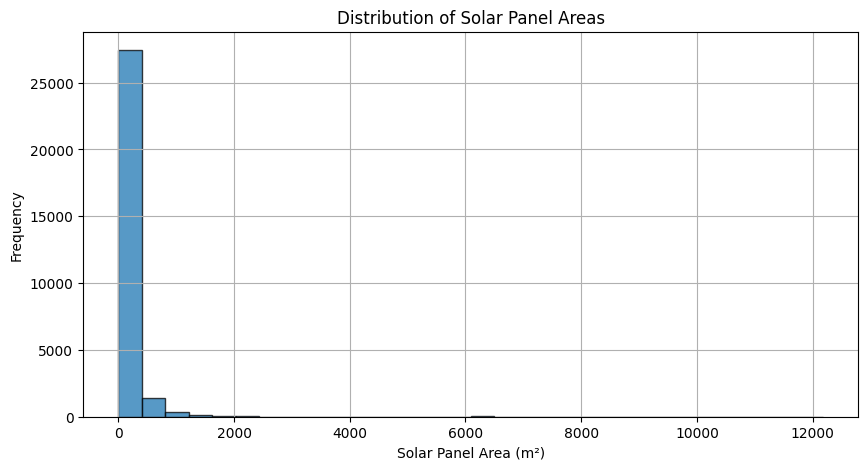

In [ ]:
label_path = "labels/labels_native"  
img_size = 416  # Native images are 416x416
pixel_size = 0.31  # Each pixel is 0.31 meters

# List to store areas of solar panels
areas = []

# Read all label files
for label_file in os.listdir(label_path):
    if label_file.endswith('.txt'):
        with open(os.path.join(label_path, label_file), 'r') as f:
            for line in f:
                data = line.strip().split()
                _, _, _, norm_width, norm_height = map(float, data)  # Extract width and height from data

                # normalized values to actual pixel size
                width_pixels = norm_width * img_size
                height_pixels = norm_height * img_size

                # pixels to meters
                width_meters = width_pixels * pixel_size
                height_meters = height_pixels * pixel_size

                # Compute area in square meters
                area_meters = width_meters * height_meters
                areas.append(area_meters)

# statistics analysis
mean_area = np.mean(areas)
std_area = np.std(areas)

# Print results
print(f"Mean Area of Solar Panels: {mean_area:.2f} m²")
print(f"Standard Deviation of Solar Panel Areas: {std_area:.2f} m²")

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(areas, bins=30, edgecolor='black', alpha=0.75)
plt.xlabel("Solar Panel Area (m²)")
plt.ylabel("Frequency")
plt.title("Distribution of Solar Panel Areas")
plt.grid(True)
plt.show()


In [ ]:
min(areas), max(areas), np.mean(areas), len(areas), sum(areas)


(1.0571000000000002,
 12177.407600000002,
 np.float64(191.51782786497893),
 29625,
 5673715.6505)

In [ ]:
l = np.array(areas)
quantiles = np.quantile(l, [0.25, 0.5, 0.75])
print("Quantiles:", quantiles)

Quantiles: [ 40.1698  91.6794 159.9104]


Method Used: 
 - There are five entries in each line of each file and the last 2 entries represent width and height of solar plate.  I just went through the all the files in native lebels, then in each file I  went through all the lines and  each line has five entries in which last two entry represents width and height of solar plate.</br></br>

Observations: 
-  As we can see in the histogram plot, the histogram of solar panels  is highly right skewed it means most of the panels have smaller areas and very few panels have significantly larger areas.
- The 25th percentile (Q1) is 40.17 m², the median (Q2) is 91.68 m², and the 75th percentile (Q3) is 159.91 m². Since the median is much closer to Q1 than Q3, this confirms the right-skewed nature of the data.
- The minimum solar panel area is approximately 1.06 m², while the maximum is around 12,177.41 m², showing a large variation in panel sizes.
-  The mean area of the solar panels is 191.52 m², but the standard deviation is 630.70 m², which shows a high spread in the data because of the presence of very large values.


# Implementing the Fundamental Functions

## 1).Write a function to compute IoU (Intersection over Union) 

 Compute IoU using the Shapely library and Then Validate IoU using the supervision library

In [ ]:
import numpy as np
import shapely.geometry as sg
import shapely.ops as so
import supervision as sv
from sklearn.metrics import auc
import random

IOU = area of overlapping of actual box and pricted box / area of union

In [ ]:
# Function to compute IoU using Shapely
def compute_iou_shapely(box1, box2):
    x1_min, y1_min = box1[0] - box1[2] / 2, box1[1] - box1[3] / 2 # x_min = x_center - width/2, y_min = y_center - height/2
    x1_max, y1_max = box1[0] + box1[2] / 2, box1[1] + box1[3] / 2 # x_max = x_center + width/2, y_max = y_center + height/2
    
    x2_min, y2_min = box2[0] - box2[2] / 2, box2[1] - box2[3] / 2
    x2_max, y2_max = box2[0] + box2[2] / 2, box2[1] + box2[3] / 2
    
    rect1 = sg.box(x1_min, y1_min, x1_max, y1_max)
    rect2 = sg.box(x2_min, y2_min, x2_max, y2_max)
    
    intersection = rect1.intersection(rect2).area
    union = rect1.area + rect2.area - intersection
    
    return intersection / union if union > 0 else 0.0

# I couldn't finout any direct method to compute IOU using supervision library
# So, I have created a function to compute IOU using numpy library to compare the results with shapeley library
def compute_iou_numpy(box1, box2):
    # Convert YOLO format to (x_min, y_min, x_max, y_max)
    box1 = [box1[0] - box1[2] / 2, box1[1] - box1[3] / 2, box1[0] + box1[2] / 2, box1[1] + box1[3] / 2]
    box2 = [box2[0] - box2[2] / 2, box2[1] - box2[3] / 2, box2[0] + box2[2] / 2, box2[1] + box2[3] / 2]

    # Calculate intersection coordinates
    x_min_intsec = max(box1[0], box2[0])
    y_min_intsec = max(box1[1], box2[1])
    x_max_intsec = min(box1[2], box2[2])
    y_max_intsec = min(box1[3], box2[3])

    # Calculate intersection area
    intsec_width = max(0, x_max_intsec - x_min_intsec)
    intsec_height = max(0, y_max_intsec - y_min_intsec)
    intsec_area = intsec_width * intsec_height

    # Calculate union area
    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    union_area = box1_area + box2_area - intsec_area

    return intsec_area / union_area if union_area > 0 else 0.0 #to avoid division by zero

In [ ]:
# To varify that both functions are giving same results
# Define two bounding boxes in YOLO format (x_center, y_center, width, height)

# converting YOLO to x_min, y_min, x_max, y_max
box1 = (50, 50, 30, 40)  # Centered at (50,50) with width 30 and height of 40
box2 = (55, 55, 30, 40)  

iou_shapely = compute_iou_shapely(box1, box2)
iou_Numpy = compute_iou_numpy(box1, box2)
print(f"IoU (Shapely): {iou_shapely:.2f}")
print(f"IoU (Numpuy): {iou_Numpy:.2f}")

IoU (Shapely): 0.57
IoU (Numpuy): 0.57


as we can see here both methods are giving same output

## 2). Write a function to compute Average Precision (AP) 

### a). Use Pascal VOC 11 point interpolation method to implement the function 

In [ ]:
import numpy as np

def ap_voc_11(recalls, precisions):
    ap = 0.0
    recall_levels = np.linspace(0, 1, 11) 

    for recall_level in recall_levels:
        max_precision = np.max(precisions[recalls >= recall_level]) if np.any(recalls >= recall_level) else 0
        ap += max_precision

    return ap / 11  # Average over 11 points

recalls = np.array([0.0, 0.1, 0.4, 0.6, 0.8, 1.0])
precisions = np.array([1.0, 0.9, 0.8, 0.75, 0.6, 0.5])
ap_voc = ap_voc_11(recalls, precisions)
print(f"AP using Pascal VOC 11 point interpolation method : {ap_voc:.4f}")


AP using Pascal VOC 11 point interpolation method : 0.7136


### b). Use COCO 101-point interpolation method to implement the function


In [ ]:
def ap_coco_101(recalls, precisions):
    
    recall_levels = np.linspace(0, 1, 101)  
    ap = 0.0

    for recall_level in recall_levels:
        max_precision = np.max(precisions[recalls >= recall_level]) if np.any(recalls >= recall_level) else 0
        ap += max_precision

    return ap / 101  # Average over 101 points


ap_coco = ap_coco_101(recalls, precisions)
print(f"AP using COCO 101-point interpolation method: {ap_coco:.4f}")


AP using COCO 101-point interpolation method: 0.7030


### c). Use Area under Precision-Recall Curve (AP) method to implement the function 

In [ ]:
from sklearn.metrics import auc

def ap_auc(recalls, precisions):
    return auc(recalls, precisions)  # it uses a rule called trapezoidal rule 

ap_AUC = ap_auc(recalls, precisions)
print(f"AP using area under precision recall curve method : {ap_AUC:.4f}")


AP using area under precision recall curve method : 0.7500


### d). Randomly generate 10 images of size 100x100. Randomly generate 10 ground truth boxes of size 20x20 and 10 predicted boxes of size 20x20 in each image. Assume there is only one class of objects. Compare the AP50 (Average Precision at IoU 0.5) computed by 3 of your methods

In [ ]:
import random

# Generate random bounding boxes
num_images = 10
img_size = 100
box_size = 20
gt_boxes, pred_boxes = [], [] # Ground-truth and predicted boxes

# generating 10 groundtruth and 10 predicted boxes for each image
for _ in range(num_images * 10):  
    gt_boxes.append((random.randint(0, img_size - box_size), random.randint(0, img_size - box_size), box_size, box_size))
    pred_boxes.append((random.randint(0, img_size - box_size), random.randint(0, img_size - box_size), box_size, box_size))

# convert groundtruth and predicted boxes to numpy arrays
gt_boxes = np.array(gt_boxes)
pred_boxes = np.array(pred_boxes)

# Compute Precision-Recall
tp, fp = 0, 0
recalls, precisions = [], []

for pred in pred_boxes:
    ious = [compute_iou_numpy(pred, gt) for gt in gt_boxes]
    if max(ious) >= 0.5:
        tp += 1
    else:
        fp += 1

    recall = tp / len(gt_boxes)
    precision = tp / (tp + fp)
    recalls.append(recall)
    precisions.append(precision)

rec = np.array(recalls)
pre = np.array(precisions)

ap_voc = ap_voc_11(rec, pre)
ap_coco = ap_coco_101(rec, pre)
ap_AUC = ap_auc(rec, pre)

print(f"AP50 (VOC 11-point): {ap_voc:.4f}")
print(f"AP50 (COCO 101-point): {ap_coco:.4f}")
print(f"AP50 (AUC method): {ap_AUC:.4f}")


AP50 (VOC 11-point): 0.7233
AP50 (COCO 101-point): 0.7431
AP50 (AUC method): 0.6901


# Model building and evaluation 

Split the data into 80-20 train-test split. Use 10% of training data as validation.


## 1). Use any model from Ultralytics like YOLO to train the object detection model. Show that validation loss is converged. 

In [ ]:
import os
from PIL import Image

# Define paths
img_dir = r"d:\OneDrive - iitgn.ac.in\Desktop\Projects\AI for sustanibility\image_chips_native"
output_dir = r"d:\OneDrive - iitgn.ac.in\Desktop\Projects\AI for sustanibility\images_converted"

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Convert images
for img_file in os.listdir(img_dir):
    if img_file.endswith(".tif"):
        img_path = os.path.join(img_dir, img_file)
        img = Image.open(img_path)
        img.save(os.path.join(output_dir, img_file.replace(".tif", ".jpg")), "JPEG")

print("Image conversion completed!")


Image conversion completed!


In [ ]:
import os
import shutil
import random

# Define paths
img_dir = r"d:\OneDrive - iitgn.ac.in\Desktop\Projects\AI for sustanibility\images_converted"
label_dir = r"d:\OneDrive - iitgn.ac.in\Desktop\Projects\AI for sustanibility\labels\labels_native"

output_base = r"d:\OneDrive - iitgn.ac.in\Desktop\Projects\AI for sustanibility"
splits = ["train", "val", "test"]

# Create directories
for split in splits:
    os.makedirs(os.path.join(output_base, "images", split), exist_ok=True)
    os.makedirs(os.path.join(output_base, "labels", split), exist_ok=True)

# List and shuffle images
image_files = [f for f in os.listdir(img_dir) if f.endswith(".jpg")]
random.shuffle(image_files)

# Split indices
train_split = int(0.8 * len(image_files))
val_split = int(0.9 * len(image_files))

# Assign images to splits
datasets = {
    "train": image_files[:train_split],
    "val": image_files[train_split:val_split],
    "test": image_files[val_split:]
}

# Move files
for split, files in datasets.items():
    for img_file in files:
        img_path = os.path.join(img_dir, img_file)
        label_path = os.path.join(label_dir, img_file.replace(".jpg", ".txt"))
        
        # Move image
        shutil.copy(img_path, os.path.join(output_base, "images", split, img_file))
        
        # Move label if exists
        if os.path.exists(label_path):
            shutil.copy(label_path, os.path.join(output_base, "labels", split, img_file.replace(".jpg", ".txt")))

print("Dataset split completed!")

Dataset split completed!


In [ ]:
from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO("yolov8n.pt")

# Train model
results = model.train(
    data=r"D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\dataset.yaml",
    epochs=1, # due to limited computation resources, I am training for 1 epoch only
    imgsz=640,
    batch=16,
    project="yolo_solar_panel",
    name="exp",
    val=True
)

Ultralytics 8.3.79  Python-3.12.0 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)


engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\dataset.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=yolo_solar_panel, name=exp13, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=Non

train: Scanning D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\labels\train... 2434 images, 0 backgrounds, 229 corrupt: 100%|██████████| 2434/2434 [00:06<00:00, 366.35it/s]

train: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\train\solarpanels_native_1__x0_0_y0_6963_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\train\solarpanels_native_1__x0_0_y0_7119_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\train\solarpanels_native_1__x0_0_y0_7229_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\train\solarpanels_native_1__x0_0_y0_7230_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNI

train: New cache created: D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\labels\train.cache


val: Scanning D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\labels\val... 483 images, 0 backgrounds, 37 corrupt: 100%|██████████| 483/483 [00:01<00:00, 376.75it/s]

val: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\val\solarpanels_native_1__x0_0_y0_7249_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\val\solarpanels_native_1__x0_1483_y0_10330_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\val\solarpanels_native_1__x0_2309_y0_8071_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\val\solarpanels_native_1__x0_2311_y0_8124_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\O

Plotting labels to yolo_solar_panel\exp13\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to yolo_solar_panel\exp13
Starting training for 1 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/1         0G       1.61      1.831      1.326        170        640: 100%|██████████| 138/138 [24:49<00:00, 10.79s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [01:11<00:00,  5.09s/it]


                   all        446       5184      0.692      0.601       0.63       0.37

1 epochs completed in 0.434 hours.
Optimizer stripped from yolo_solar_panel\exp13\weights\last.pt, 6.2MB
Optimizer stripped from yolo_solar_panel\exp13\weights\best.pt, 6.2MB

Validating yolo_solar_panel\exp13\weights\best.pt...
Ultralytics 8.3.79  Python-3.12.0 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:59<00:00,  4.24s/it]


                   all        446       5184      0.693      0.601      0.631       0.37
Speed: 2.8ms preprocess, 106.8ms inference, 0.0ms loss, 14.4ms postprocess per image
Results saved to yolo_solar_panel\exp13


In [ ]:
metrics = model.val()

Ultralytics 8.3.79  Python-3.12.0 torch-2.6.0+cpu CPU (11th Gen Intel Core(TM) i5-11400H 2.70GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\labels\val.cache... 483 images, 0 backgrounds, 37 corrupt: 100%|██████████| 483/483 [00:00<?, ?it/s]

val: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\val\solarpanels_native_1__x0_0_y0_7249_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\val\solarpanels_native_1__x0_1483_y0_10330_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\val\solarpanels_native_1__x0_2309_y0_8071_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\val\solarpanels_native_1__x0_2311_y0_8124_dxdy_416.jpg: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING  D:\O


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 28/28 [00:45<00:00,  1.62s/it]


                   all        446       5184      0.693      0.601      0.631       0.37
Speed: 2.0ms preprocess, 80.0ms inference, 0.0ms loss, 12.4ms postprocess per image
Results saved to yolo_solar_panel\exp132


## 2). Predict solar panels using the trained model. Visualize the ground truth and predicted bounding boxes on 3-4 random samples from the test dataset. Use appropriate color schemes to differentiate between ground truth and predicted labels

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Predict on test images and show them
results = model.predict(source=r"D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\test", save=True)



image 1/486 D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\test\solarpanels_native_1__x0_0_y0_6963_dxdy_416.jpg: 640x640 6 solar_panels, 106.5ms
image 2/486 D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\test\solarpanels_native_1__x0_0_y0_7230_dxdy_416.jpg: 640x640 3 solar_panels, 89.3ms
image 3/486 D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\test\solarpanels_native_1__x0_10044_y0_10824_dxdy_416.jpg: 640x640 3 solar_panels, 80.4ms
image 4/486 D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\test\solarpanels_native_1__x0_10045_y0_10827_dxdy_416.jpg: 640x640 3 solar_panels, 79.6ms
image 5/486 D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\test\solarpanels_native_1__x0_10081_y0_11390_dxdy_416.jpg: 640x640 2 solar_panels, 77.8ms
image 6/486 D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\test\solarpanels_native_1__x0_10313_y0_12985_dxdy_416.jpg: 6

In [ ]:
for i, result in enumerate(results[:3]):  
    img = cv2.imread(result.path)
    
    if img is None:
        print(f"Error in loading: {result.path}")
        continue
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.title(f"Prediction {i+1}")
    plt.axis("off")
    plt.show()


<Figure size 600x600 with 1 Axes>

<Figure size 600x600 with 1 Axes>

<Figure size 600x600 with 1 Axes>

## 3). Use supervision.metrics functionality from supervision library to compute the following metrics.

### a). Compute mAP50 with supervision and compare with your implementation. What do you observe 

In [ ]:
from supervision.metrics import MeanAveragePrecision

mAP_calculator = MeanAveragePrecision(
    ground_truth_path=r"D:\OneDrive - iitgn.ac.in\Desktop\Projects\AI_for_Sustanability\images\test",
    predictions_path="yolo_solar_panel/exp134"
)

mAP50 = mAP_calculator.compute()
print(f"mAP50 (supervision): {mAP50:.4f}")


### b). Create a table of Precision, Recall and F1-scores where rows are IoU thresholds [0.1, 0.3, 0.5, 0.7, 0.9] and columns are confidence thresholds [0.1, 0.3, 0.5, 0.7, 0.9] (Hint use supervision.metrics.ConfusionMatrix to get the confusion matrix and get TP, FP and FN from it to compute the P, R and F-1) 

In [ ]:
from supervision.metrics import ConfusionMatrix
import pandas as pd

iou_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
conf_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
data = []

for iou in iou_thresholds:
    row = []
    for conf in conf_thresholds:
        cm = ConfusionMatrix(ground_truth_path="labels/test/", predictions_path="yolo_solar_panel/exp134", iou_threshold=iou, confidence_threshold=conf)
        precision = cm.precision()
        recall = cm.recall()
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0 #f1_score = 2 * (precision * recall) / (precision + recall)
        row.append(f"{precision:.2f}, {recall:.2f}, {f1_score:.2f}")
    data.append(row)

df = pd.DataFrame(data, index=iou_thresholds, columns=conf_thresholds)
print(df)